# Open Questions

- We don't have nps rating for all users who have submitted written feedback and all users who don't have feedback have nps rating

# Sentiment Analysis

Sentiment analysis, also called opinion mining, is a technique used in Natural Language Processing to automatically extract the sentiment behind a piece of text. It's usually used to help businesses understand the social sentiment users/customers feel about their products, services and brand.

Basically, sentiment analysis is a text classification problem. In most cases we are trying to classify text into either positive, neutral or negative classes. These classes however, depend on how we would like to categorize the text. It could be taken a step further where also feelings (happiness, anger,sadness, etc) can be approximated. 

However, just labeling reviews or user feedback based on these categories doesn't give business owners any actionable insights on how to improve their product and satisfy customers. That's where Aspect-based sentiment analysis (ABSA)comes in. It's helps determine which feature (or aspect) people are mentioning and how they feel about it. For example, A product review reads: "The loading times are too long". In this case the aspect being mentioned is "loading time" and the sentiment behind it is negative ("too long). This is what an ABSA classifier would be able to determine.

## EasyPark NPS Surveys

In this project we'll be looking into EasyPark, a mobile app which helps you find and pay for parking spaces. EasyPark conducted an NPS (Net Promoter Score) survey, in order to see how likely their users would recommend the app to others on a scale of 1 to 10. The users had the option to leave feedback on the app. this is what we will be looking into today and conduct a sentiment analysis to help EasyPark improve their service.

Let's start by importing all the libraries we'll be needing fro this analysis

In [280]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from nltk.corpus import stopwords
from googletrans import Translator

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline, make_pipeline
from nltk.stem import WordNetLemmatizer

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import nltk
import string

# show all columns of dataframe
pd.set_option('display.max_columns', None)

I have the data saved as a CSV file which I will now load in

In [20]:
# load data
df_ep_nps = pd.read_csv("../raw_data/EasyPark_Braze_For_Moahmed.csv", low_memory=False)
df_ep_nps.head()

,campaign,user_id,nps_rating,nps_detractors_feedback,business_unit,language,platform,country,home_country,app_rating_committed,pre_rating,post_rating_feedback,date,csat_segment,csat_b2ccoms_content,csat_b2ccoms_channel,csat_b2ccoms_frequency,csat_b2ccoms_feedback,client_name,nps_answer,nps_survey
0,App Rating survey,iXEarPyfGaNwYJm7BkZ+CluEbQYlHsTKLxDAt0LTOU/1TS...,NaN,NaN,NaN,sv,ios,SE,SE,NaN,thumbs-up,NaN,2021-12-01,NaN,NaN,NaN,NaN,NaN,easypark,NaN,NaN
1,App Rating survey,kRab2LpLHAv9ape9mj8zaz0yiJJts29Obw9gz89VSBGfUh...,NaN,NaN,NaN,sv,ios,SE,SE,NaN,thumbs-up,NaN,2021-12-01,NaN,NaN,NaN,NaN,NaN,easypark,NaN,NaN
2,App Rating survey,TUmw7VgjjzodCAR8fWRVC9PlXuVMCHiao2Hnujt1fHUNV0...,NaN,NaN,NaN,sv,ios,SE,SE,NaN,thumbs-up,NaN,2021-12-01,NaN,NaN,NaN,NaN,NaN,easypark,NaN,NaN
3,App Rating survey,faODXjq0AEf+LZ8DVd1fQq7kSSvURyKvHyKpTyp6OG5FwD...,NaN,NaN,NaN,sv,ios,SE,SE,NaN,thumbs-up,NaN,2021-12-01,NaN,NaN,NaN,NaN,NaN,easypark,NaN,NaN
4,App Rating survey,EG3DjAi/+wLz+Ni+jyCqou1gAibizWp/1OP2UbOcwsYpf9...,NaN,NaN,NaN,sv,ios,SE,SE,NaN,thumbs-up,NaN,2021-12-01,NaN,NaN,NaN,NaN,NaN,easypark,NaN,NaN


## Simple EDA

Lets do a simple exploratory data analysis to get a sense of the dataset and overall statistics

In [21]:
df_ep_nps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1385483 entries, 0 to 1385482
Data columns (total 21 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   campaign                 1385483 non-null  object 
 1   user_id                  1384721 non-null  object 
 2   nps_rating               12139 non-null    float64
 3   nps_detractors_feedback  216 non-null      object 
 4   business_unit            12176 non-null    object 
 5   language                 1385477 non-null  object 
 6   platform                 1384863 non-null  object 
 7   country                  1385483 non-null  object 
 8   home_country             1373947 non-null  object 
 9   app_rating_committed     66585 non-null    object 
 10  pre_rating               1353595 non-null  object 
 11  post_rating_feedback     8566 non-null     object 
 12  date                     1385483 non-null  object 
 13  csat_segment             17095 non-null   

In [22]:
df_ep_nps.describe()

,nps_rating,csat_b2ccoms_content,csat_b2ccoms_channel,csat_b2ccoms_frequency,nps_answer,nps_survey
count,12139.000000,11258.000000,10206.000000,9615.000000,0.0,0.0
mean,8.886234,4.364807,4.381050,4.341966,NaN,NaN
std,2.147853,1.009185,0.974496,1.004029,NaN,NaN
min,0.000000,1.000000,1.000000,1.000000,NaN,NaN
25%,8.000000,4.000000,4.000000,4.000000,NaN,NaN
50%,10.000000,5.000000,5.000000,5.000000,NaN,NaN
75%,10.000000,5.000000,5.000000,5.000000,NaN,NaN
max,10.000000,5.000000,5.000000,5.000000,NaN,NaN


Check for missing values

In [23]:
df_ep_nps.isnull().sum()

campaign                         0
user_id                        762
nps_rating                 1373344
nps_detractors_feedback    1385267
business_unit              1373307
language                         6
platform                       620
country                          0
home_country                 11536
app_rating_committed       1318898
pre_rating                   31888
post_rating_feedback       1376917
date                             0
csat_segment               1368388
csat_b2ccoms_content       1374225
csat_b2ccoms_channel       1375277
csat_b2ccoms_frequency     1375868
csat_b2ccoms_feedback      1384500
client_name                      0
nps_answer                 1385483
nps_survey                 1385483
dtype: int64

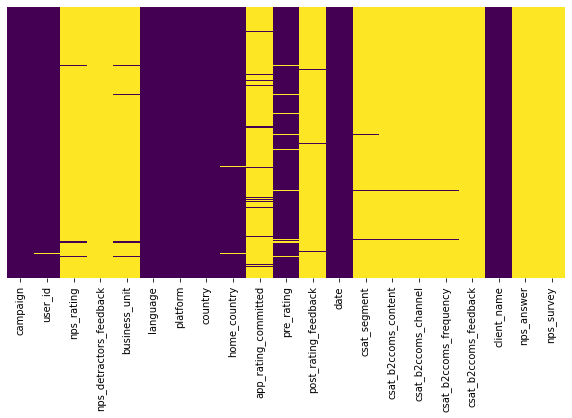

In [24]:
plt.figure(figsize=(10, 5))
sns.heatmap(df_ep_nps.isnull(),
        yticklabels=False,
        cbar=False,
        cmap='viridis')
plt.show()

There are a lot of missing values in the dataset. We'll have to do some data cleaning before we can start the sentiment analysis

Let's check the timeline of the survey and how many surveys were sent out to users per day

In [25]:
# convert "date" column to datetime
df_ep_nps["date"] = pd.to_datetime(df_ep_nps["date"], format="%Y-%m-%d")
print(df_ep_nps["date"].min(), df_ep_nps["date"].max())

2021-01-15 00:00:00 2022-04-06 00:00:00


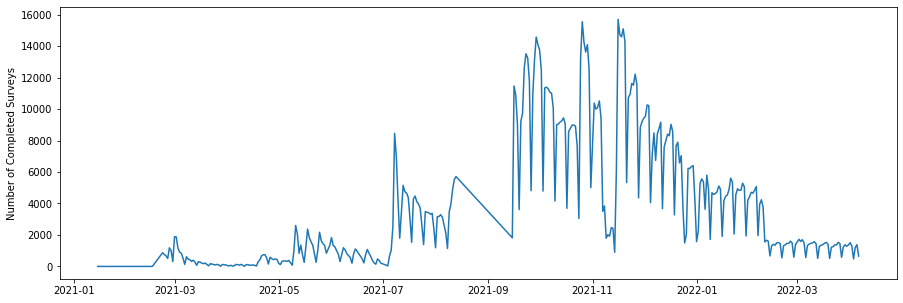

In [26]:
# plot number of surveys conducted per day
df_survery_per_day = df_ep_nps.groupby(df_ep_nps["date"], as_index=False).count()[["date", "campaign"]]

fig = plt.figure(figsize = (15, 5))
sns.lineplot(data=df_survery_per_day, x="date", y="campaign")
plt.xlabel("")
plt.ylabel("Number of Completed Surveys");

In [27]:
# check platforms
df_ep_nps["platform"].unique()

array(['ios', 'android', nan, 'web', 'iOS', 'Android', 'Web'],
      dtype=object)

We have duplicate categories that were spelled differently (with and without uppercase). Lets make sure that all categories have the same spelling convention.

In [28]:
# convert to lower case
df_ep_nps["platform"] = df_ep_nps["platform"].str.lower()

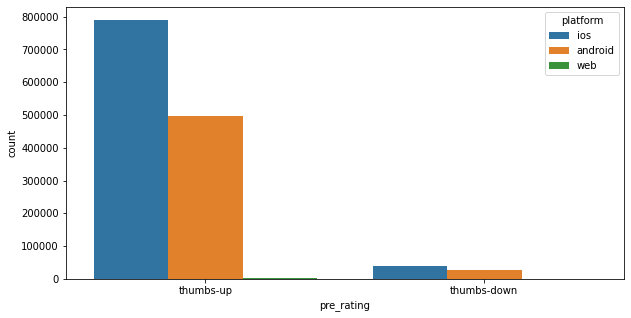

In [29]:
# plot pre ratings by platform
fig = plt.figure(figsize = (10, 5))
plt.ticklabel_format(style='plain', axis='y')
sns.countplot(data=df_ep_nps, x="pre_rating", hue="platform");

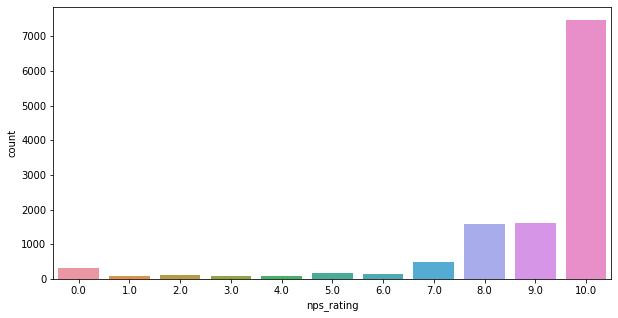

In [30]:
# plot nps score distribution
fig = plt.figure(figsize = (10, 5))
plt.ticklabel_format(style='plain', axis='y')
sns.countplot(data=df_ep_nps, x="nps_rating");

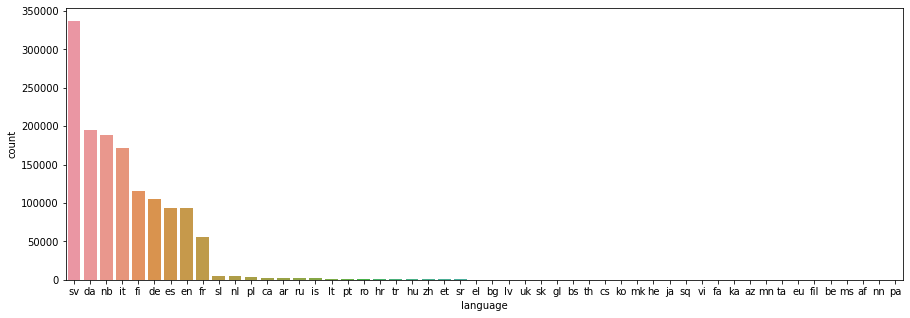

In [31]:
# plot number of languages
fig = plt.figure(figsize = (15, 5))
plt.ticklabel_format(style='plain', axis='y')
sns.countplot(data=df_ep_nps,
              x="language",order=df_ep_nps["language"].value_counts().index );

In [32]:
# check if uder id is unique
sum(df_ep_nps["user_id"].duplicated())

761

It seems that we have users who have taken the survey more than once. This could lead to a bad user experience, since users might get annoyed if they receive the same survey more than once and could effect their score.

In [33]:
df_ep_nps[df_ep_nps["user_id"].duplicated() == True]["user_id"].unique()

array([nan], dtype=object)

The duplicated users were actually not duplicates at all. The user id wasn't correctly tracked or wasn't available and was given the value "none". In analytics platforms such as Amplitude, it is advised to not set user id as "none" when it's not available since all rows with the "none" user id will be considered the same user which leads to false conclusions. 

## Data Cleaning

Since were only interested in conducting the sentiment analysis on rows where written feedback from the user is available, I'll remove all rows with missing feedback and keep only columns useful for the analysis.

In [34]:
# keep only rows where feedback is available
df_ep_nps_clean = df_ep_nps[~df_ep_nps["post_rating_feedback"].isnull()]

# keep only needed columns
df_ep_nps_clean = df_ep_nps_clean[[
                                   'date',
                                   'campaign',
                                   'user_id',
                                   'nps_rating',
                                   'language',
                                   'platform',
                                   'country',
                                   'home_country',
                                   'pre_rating',
                                   'post_rating_feedback',
                                  ]]

In [35]:
df_ep_nps_clean["nps_rating"].unique()

array([nan])

It seems that we don't have and nps rating for users who gave feedback. In this case we need to rely on the pre rating as a label for the feedback (positive or negative).

In [36]:
# drop nps_rating column
df_ep_nps_clean.drop("nps_rating", axis=1, inplace=True)

In [37]:
df_ep_nps_clean["pre_rating"].unique()

array(['thumbs-down', 'thumbs-up', nan], dtype=object)

## Translating Feedback

The dataset includes feedback in 52 different languages. Before we can conduct the sentiment analysis, we'll need to translate the feedback into English first, since most of the NLP libraries and tools are well established for English.

Support for other languages does exist and it is considered best practice to conduct text analyses on the original text language since translating could result in information loss and sometimes even alters the whole semantic meaning of the text. However, to save some time we'll translate the text to English first.

To translate reviews, we'll use the free to use Google Translate API - It's implemented in a Python library called "googletrans" which can be installed and used. 

The library does limit the number of API calls you can make within a certain amount of time. For more information checkout the documentation [here](https://py-googletrans.readthedocs.io/en/latest/).

In [38]:
# check feedback column
df_ep_nps_clean["language"].nunique()

25

In [48]:
df_ep_nps_clean["language"]

20         de
21         en
116        nb
205        de
207        en
           ..
1384169    es
1384284    en
1384285    es
1384828    sv
1385154    sv
Name: language, Length: 8566, dtype: object

In [131]:
# create trasnlator instance
translator = Translator()

def translate_text(text):
    translation = translator.translate(text, dest='en')
    return translation.text    
    

In [133]:
tqdm.pandas()
df_ep_nps_clean["post_rating_feedback_translated"] = df_ep_nps_clean["post_rating_feedback"].progress_apply(translate_text)


100%|███████████████████████████████████████| 8566/8566 [15:15<00:00,  9.35it/s]


## Text Preprocessing

Before we can conduct the sentiment analysis we'll have to first perform some preprocessing which will include:

- removing "stopwords" (common words that don't give much information such as a, I, the, is, etc.)
- Lowercasing
- Lemmatizing (transform words to their roots)
- Removing digits and punctuation

For this we'll use the NLTK library which provides us with a lot of tools useful for NLP

In [134]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [289]:
# make class for preprocessing (lowercasing and digit removal)

class TextPreprocessor(BaseEstimator, TransformerMixin):
    
        
    def fit(self, *_):
        return self

    def transform(self, X, *_):
        
        result = X.iloc[:, 0].apply(self.text_preprocessing)
        return pd.DataFrame(result, columns=X.columns)
    
    def fit_transform(self, X, *_):
        
        result = X.iloc[:, 0].apply(self.text_preprocessing)
        return pd.DataFrame(result, columns=X.columns)
    
    def text_preprocessing(self, text: str) -> str:
        """
        Function to perform text preprocessing steps
        """
        for punctuation in string.punctuation:
            text = text.replace(punctuation, ' ') # Remove Punctuation

        lowercased = text.lower()
        tokenized = word_tokenize(lowercased)
        no_numbers = [word for word in tokenized if word.isalpha()]
        
        return " ".join(no_numbers)
    
    

In [290]:
from nltk import pos_tag, word_tokenize

class WordLemmatizer(BaseEstimator, TransformerMixin):
            
    def fit(self, *_):
        return self

    def transform(self, X, *_):
        
        result = X.iloc[:, 0].apply(self.text_lemmatizer)
        return pd.DataFrame(result, columns=X.columns)
    
    def fit_transform(self, X, *_):
        result = X.iloc[:, 0].apply(self.text_lemmatizer)
        print()
        return pd.DataFrame(result, columns=X.columns)
    
    def text_lemmatizer(self, text: str) -> str:
        """
        Function to perform text preprocessing steps
        """
        
        lemmatizer = WordNetLemmatizer()
        tokenized = word_tokenize(text)
        
        # lemmatizer requires the correct POS tag to be accurate
        lemmatized = []
        for word, tag in pos_tag(tokenized):
            wntag = tag[0].lower()
            wntag = wntag if wntag in ['a', 'r', 'n', 'v'] else None
            lemma = lemmatizer.lemmatize(word, wntag) if wntag else word
            
            lemmatized.append(lemma)
                
        return " ".join(lemmatized)

In [291]:
# write transformer for removing stop words
# include option to input list of stopwords that should not be removed



In [292]:
from sklearn.compose import ColumnTransformer

# Impute then Scale for numerical variables: 
text_transformer = Pipeline([
    ('processors', TextPreprocessor()),
    ('lemmatizer', WordLemmatizer())
    ])

# Paralellize "num_transformer" and "One hot encoder"
preprocessor = ColumnTransformer([
    ('text_tr', text_transformer, ["post_rating_feedback_translated"])],
    remainder='passthrough')

In [293]:
results = preprocessor.fit_transform(df_ep_nps_clean)

In [294]:
df_ep_nps_clean

,date,campaign,user_id,language,platform,country,home_country,pre_rating,post_rating_feedback,post_rating_feedback_translated
20,2021-12-01,App Rating survey,TVqKk8tryoRsY6HHnlSF4RhSchY7iv2gmx88jJPeIcLooh...,de,android,DE,DE,thumbs-down,Könnte nur im 2 Stundentakt buchen,Could only book every 2 hours
21,2021-12-01,App Rating survey,h90Bqj4rohbielpux0bvspHlSyrv0mEHhw/Q/pyb2PNq5f...,en,android,SE,SE,thumbs-down,Need to pay before you park. Instead of paying...,Need to pay before you park. Instead of paying...
116,2021-12-01,App Rating survey,JpCooEKFC51SMcSPCIatwzgxMydTO1QA4q7B2CqlDl4ptz...,nb,ios,NO,NO,thumbs-down,Liker ikke at jeg ikke har kontroll over inn o...,Do not like that I do not have control over th...
205,2021-12-01,App Rating survey,QexnI4pHDssD9v7CGgpFBOqfeEQeXGXKTjYHF5/kh7bLe6...,de,ios,DE,DE,thumbs-down,Apple pay,Apple pay
207,2021-12-01,App Rating survey,ijBdoAXRYZbb6YNDM2KSBLylccFMN18bZFHtU7GGClMd/m...,en,android,NO,NO,thumbs-down,Bad,Bad
...,...,...,...,...,...,...,...,...,...,...
1384169,2021-10-07,App Rating survey,gmqzDToUvT3+MTCWpHyg2IG1GvZK9UAodWue7Tg+m7datO...,es,ios,ES,ES,thumbs-down,No se si he pagado dos veces,I don't know if I paid twice
1384284,2021-10-07,App Rating survey,GJPTlIm+WB/XYCbkI0Y2ZH8YlnyJkdkMFO2aUvLkHUH20S...,en,ios,DE,DE,thumbs-down,Selecting the parking zone has made it difficult,Selecting the parking zone has made it difficult
1384285,2021-10-07,App Rating survey,IgevsINt21hXlVGOWEWXzvYMSLn9CkrLEHG/TEE2ItHS4z...,es,ios,ES,ES,thumbs-down,Nunca va bien y es un rollo la rueda y los bar...,It never goes well and the wheel is a pain and...
1384828,2021-10-07,App Rating survey,flf3f7AgM3xjpCOF965PhUMIcC6yM+EPB0cJAlhrGG2+qr...,sv,ios,SE,SE,thumbs-down,Svindyrt,Very expensive


In [295]:
pd.DataFrame(results)

,0,1,2,3,4,5,6,7,8,9
0,could only book every hour,2021-12-01,App Rating survey,TVqKk8tryoRsY6HHnlSF4RhSchY7iv2gmx88jJPeIcLooh...,de,android,DE,DE,thumbs-down,Könnte nur im 2 Stundentakt buchen
1,need to pay before you park instead of pay whe...,2021-12-01,App Rating survey,h90Bqj4rohbielpux0bvspHlSyrv0mEHhw/Q/pyb2PNq5f...,en,android,SE,SE,thumbs-down,Need to pay before you park. Instead of paying...
2,do not like that i do not have control over th...,2021-12-01,App Rating survey,JpCooEKFC51SMcSPCIatwzgxMydTO1QA4q7B2CqlDl4ptz...,nb,ios,NO,NO,thumbs-down,Liker ikke at jeg ikke har kontroll over inn o...
3,apple pay,2021-12-01,App Rating survey,QexnI4pHDssD9v7CGgpFBOqfeEQeXGXKTjYHF5/kh7bLe6...,de,ios,DE,DE,thumbs-down,Apple pay
4,bad,2021-12-01,App Rating survey,ijBdoAXRYZbb6YNDM2KSBLylccFMN18bZFHtU7GGClMd/m...,en,android,NO,NO,thumbs-down,Bad
...,...,...,...,...,...,...,...,...,...,...
8561,i don t know if i pay twice,2021-10-07,App Rating survey,gmqzDToUvT3+MTCWpHyg2IG1GvZK9UAodWue7Tg+m7datO...,es,ios,ES,ES,thumbs-down,No se si he pagado dos veces
8562,select the park zone have make it difficult,2021-10-07,App Rating survey,GJPTlIm+WB/XYCbkI0Y2ZH8YlnyJkdkMFO2aUvLkHUH20S...,en,ios,DE,DE,thumbs-down,Selecting the parking zone has made it difficult
8563,it never go well and the wheel be a pain and t...,2021-10-07,App Rating survey,IgevsINt21hXlVGOWEWXzvYMSLn9CkrLEHG/TEE2ItHS4z...,es,ios,ES,ES,thumbs-down,Nunca va bien y es un rollo la rueda y los bar...
8564,very expensive,2021-10-07,App Rating survey,flf3f7AgM3xjpCOF965PhUMIcC6yM+EPB0cJAlhrGG2+qr...,sv,ios,SE,SE,thumbs-down,Svindyrt


# Using Google Translate API

In [12]:
import googletrans

In [13]:
gt_api_languages = googletrans.LANGUAGES
gt_api_languages

{'af': 'afrikaans',
 'sq': 'albanian',
 'am': 'amharic',
 'ar': 'arabic',
 'hy': 'armenian',
 'az': 'azerbaijani',
 'eu': 'basque',
 'be': 'belarusian',
 'bn': 'bengali',
 'bs': 'bosnian',
 'bg': 'bulgarian',
 'ca': 'catalan',
 'ceb': 'cebuano',
 'ny': 'chichewa',
 'zh-cn': 'chinese (simplified)',
 'zh-tw': 'chinese (traditional)',
 'co': 'corsican',
 'hr': 'croatian',
 'cs': 'czech',
 'da': 'danish',
 'nl': 'dutch',
 'en': 'english',
 'eo': 'esperanto',
 'et': 'estonian',
 'tl': 'filipino',
 'fi': 'finnish',
 'fr': 'french',
 'fy': 'frisian',
 'gl': 'galician',
 'ka': 'georgian',
 'de': 'german',
 'el': 'greek',
 'gu': 'gujarati',
 'ht': 'haitian creole',
 'ha': 'hausa',
 'haw': 'hawaiian',
 'iw': 'hebrew',
 'he': 'hebrew',
 'hi': 'hindi',
 'hmn': 'hmong',
 'hu': 'hungarian',
 'is': 'icelandic',
 'ig': 'igbo',
 'id': 'indonesian',
 'ga': 'irish',
 'it': 'italian',
 'ja': 'japanese',
 'jw': 'javanese',
 'kn': 'kannada',
 'kk': 'kazakh',
 'km': 'khmer',
 'ko': 'korean',
 'ku': 'kurdish 

In [10]:
# check that all feedback languages are supported by the API
df_feedback_available["language"]

20         de
21         en
116        nb
205        de
207        en
           ..
1384169    es
1384284    en
1384285    es
1384828    sv
1385154    sv
Name: language, Length: 8566, dtype: object

In [11]:
[lan for lan in df_feedback_available["language"].unique() if lan not in gt_api_languages.keys()]

['nb']

"nb" (Bokmål) is one of the official Norwegian languages

In [12]:
gt_api_languages["no"]

'norwegian'

Google Translate API supports both Norwegian languages (Bokmål and Nynorsk) and are both listed under "no". Therefore we can conclude that all feedback languages are supported by Google Translate.

## Prepare reviews for translation

In [16]:
from googletrans import Translator



translator = Translator()
result = translator.translate('Hallo.', )

In [17]:
print(result.src)
print(result.dest)
print(result.origin)
print(result.text)
print(result.pronunciation)

de
fr
Hallo.
Salut.
None


In [31]:
import time
from tqdm import tqdm

In [ ]:
for feedback in tqdm(df_feedback_available["post_rating_feedback"].values):
    if feedback in feedback_dict:
        continue
    result = translator.translate(feedback).text
    feedback_dict[feedback] = result

In [33]:
df_feedback_available["post_rating_feedback_translated"] = df_feedback_available["post_rating_feedback"].map(feedback_dict)


/var/folders/t5/2vtmnxs90kx7flyvm9lmcfzm0000gn/T/ipykernel_11150/964878858.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_feedback_available["post_rating_feedback_translated"] = df_feedback_available["post_rating_feedback"].map(feedback_dict)


In [57]:
df_feedback_available.to_excel("../data/EasyPark_feedback_available_translated.xlsx", index=False)

# Plan for Sentiment Analysis

## EDA

In [36]:
df["post_rating_feedback_translated"] = df["post_rating_feedback"].map(feedback_dict)

In [38]:
df["date"]

0          2021-12-01
1          2021-12-01
2          2021-12-01
3          2021-12-01
4          2021-12-01
              ...    
1385478    2021-10-07
1385479    2021-10-07
1385480    2021-10-07
1385481    2021-10-07
1385482    2021-10-07
Name: date, Length: 1385483, dtype: object

In [40]:
#convert to datetime
df["date"] = pd.to_datetime(df["date"], format="%Y-%m-%d")

In [42]:
# plot feedback survey overtime

df.columns

Index(['campaign', 'user_id', 'nps_rating', 'nps_detractors_feedback',
       'business_unit', 'language', 'platform', 'country', 'home_country',
       'app_rating_committed', 'pre_rating', 'post_rating_feedback', 'date',
       'csat_segment', 'csat_b2ccoms_content', 'csat_b2ccoms_channel',
       'csat_b2ccoms_frequency', 'csat_b2ccoms_feedback', 'client_name',
       'nps_answer', 'nps_survey', 'post_rating_feedback_translated'],
      dtype='object')

In [43]:
df["nps_rating"].unique()

array([nan,  4.,  3.,  0.,  8.,  9., 10.,  7.,  6.,  1.,  2.,  5.])

In [44]:
df["pre_rating"].unique()

array(['thumbs-up', 'thumbs-down', nan], dtype=object)

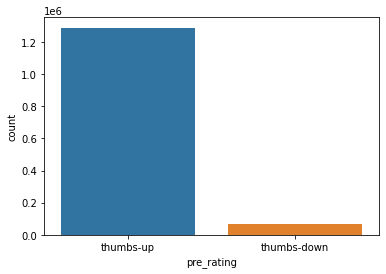

In [53]:
sns.countplot(data=df, x="pre_rating");

<AxesSubplot:xlabel='nps_rating', ylabel='count'>

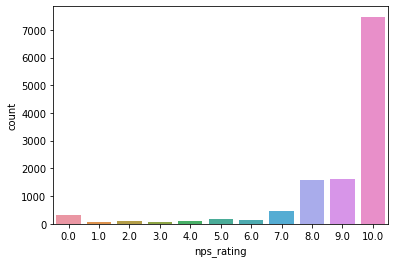

In [54]:
sns.countplot(data=df, x="nps_rating")

While NPS and pre ratings provide a summary of how users feel about their experience, they don’t tell us why users feel the way they do. What is it do they like about the app? What features or qualities don't they like?

We'll have to look more closely into the reviews themselves to be ablte to extract the actual sentiment behind it.

In [93]:
# read in AFINN word list and convert to dictionary
word_sentiment_dict = {}
with open("../data/AFINN/AFINN-111.txt","r") as word_dict:
    lines = word_dict.readlines()
    word_sentiment_dict = {word.upper(): int(score.replace("\n", "")) for word, score in [line.split("\t") for line in lines]} 
    # Strips the newline character

In [94]:
word_sentiment_dict

{'ABANDON': -2,
 'ABANDONED': -2,
 'ABANDONS': -2,
 'ABDUCTED': -2,
 'ABDUCTION': -2,
 'ABDUCTIONS': -2,
 'ABHOR': -3,
 'ABHORRED': -3,
 'ABHORRENT': -3,
 'ABHORS': -3,
 'ABILITIES': 2,
 'ABILITY': 2,
 'ABOARD': 1,
 'ABSENTEE': -1,
 'ABSENTEES': -1,
 'ABSOLVE': 2,
 'ABSOLVED': 2,
 'ABSOLVES': 2,
 'ABSOLVING': 2,
 'ABSORBED': 1,
 'ABUSE': -3,
 'ABUSED': -3,
 'ABUSES': -3,
 'ABUSIVE': -3,
 'ACCEPT': 1,
 'ACCEPTED': 1,
 'ACCEPTING': 1,
 'ACCEPTS': 1,
 'ACCIDENT': -2,
 'ACCIDENTAL': -2,
 'ACCIDENTALLY': -2,
 'ACCIDENTS': -2,
 'ACCOMPLISH': 2,
 'ACCOMPLISHED': 2,
 'ACCOMPLISHES': 2,
 'ACCUSATION': -2,
 'ACCUSATIONS': -2,
 'ACCUSE': -2,
 'ACCUSED': -2,
 'ACCUSES': -2,
 'ACCUSING': -2,
 'ACHE': -2,
 'ACHIEVABLE': 1,
 'ACHING': -2,
 'ACQUIT': 2,
 'ACQUITS': 2,
 'ACQUITTED': 2,
 'ACQUITTING': 2,
 'ACRIMONIOUS': -3,
 'ACTIVE': 1,
 'ADEQUATE': 1,
 'ADMIRE': 3,
 'ADMIRED': 3,
 'ADMIRES': 3,
 'ADMIRING': 3,
 'ADMIT': -1,
 'ADMITS': -1,
 'ADMITTED': -1,
 'ADMONISH': -2,
 'ADMONISHED': -2,
 'ADOPT': 

In [83]:
df_feedback_available["post_rating_feedback_translated"]

20                           Could only book in 2 hour clock
21         Need to pay before you park. Instead of paying...
116        Don't like I don't have control over and out s...
205                                                Apple pay
207                                                      Bad
                                 ...                        
1384169                   I do not know if I have paid twice
1384284     Selecting the parking zone has made it difficult
1384285    It is never going well and it is a roll the wh...
1384828                                             Swindrt.
1385154                   Lower the price!12kr for 5 min ...
Name: post_rating_feedback_translated, Length: 8566, dtype: object

In [102]:
# map each word in review to sentiment score
# if word not in sentiment dictionary -> give word a neutral score 0

test_review = df_feedback_available["post_rating_feedback_translated"].iloc[8]
test_review

'I was not aware that the first attempt of payment had no success. I have risked to be fined. Some mechanism to improve the need and visibility of a successful start should be conceived.'

## Convert Feedback to Sentiment Score

In [206]:
stop_words = stopwords.words("english")

def convert_text_to_sentiment_scores(text: str) -> list:
    # remove stop words
    text_without_stop_words = [word for word in text.split() if word not in stop_words]
    return np.array([word_sentiment_dict.get(word.upper(), 0) for word in text_without_stop_words])

In [207]:
# add column for word scores
df_feedback_available["sentiment_per_word"] = df_feedback_available["post_rating_feedback_translated"].apply(convert_text_to_sentiment_scores)

# add column for avergage sentiment score of review
df_feedback_available["average_feedback_sentiment"] = df_feedback_available["sentiment_per_word"].map(np.mean)


/var/folders/t5/2vtmnxs90kx7flyvm9lmcfzm0000gn/T/ipykernel_11150/3065777257.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_feedback_available["sentiment_per_word"] = df_feedback_available["post_rating_feedback_translated"].apply(convert_text_to_sentiment_scores)
/Users/moe/.pyenv/versions/phiture_3.8.13/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/moe/.pyenv/versions/phiture_3.8.13/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/var/folders/t5/2vtmnxs90kx7flyvm9lmcfzm0000gn/T/ipykernel_11150/3065777257.py:5: SettingWithCopyWar

In [208]:
df_feedback_available["average_feedback_sentiment"]

20         0.000000
21        -0.333333
116        0.285714
205       -0.500000
207       -3.000000
             ...   
1384169    0.000000
1384284   -0.200000
1384285   -0.250000
1384828    0.000000
1385154    0.000000
Name: average_feedback_sentiment, Length: 8566, dtype: float64

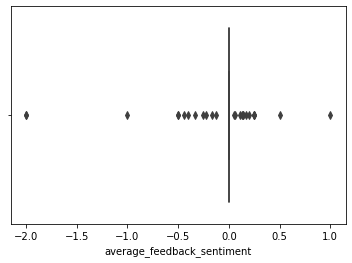

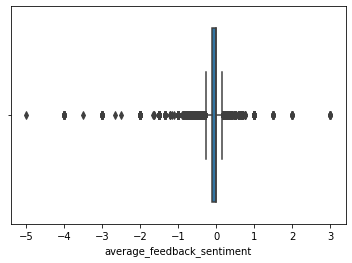

In [209]:
# plot avergage sentiment distrubution
df_thumbs_up = df_feedback_available[df_feedback_available["pre_rating"] == "thumbs-up"]
df_thumbs_down = df_feedback_available[df_feedback_available["pre_rating"] == "thumbs-down"]

sns.boxplot(data=df_thumbs_up, x="average_feedback_sentiment")
plt.show()
sns.boxplot(data=df_thumbs_down, x="average_feedback_sentiment");

<AxesSubplot:xlabel='frequency', ylabel='word'>

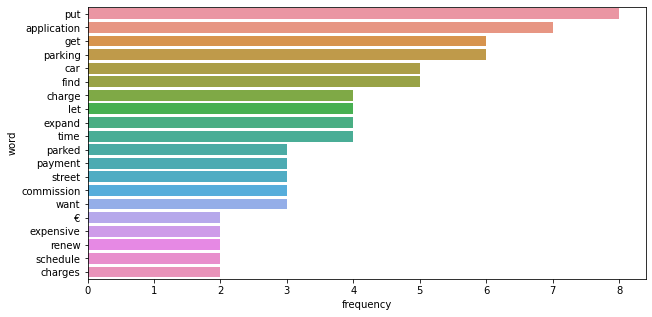

In [219]:
# common words assosiated with thumbs up review

pos_feedback_words = np.array([word.lower() for word in df_thumbs_up["post_rating_feedback_translated"].str.split().sum()])

# remove stop words
pos_feedback_words = [word for word in pos_feedback_words if word not in stop_words]

word_count = np.unique(pos_feedback_words, return_counts=True)
dict(zip(word_count[0],word_count[1]))

df_word_pos_freq = pd.DataFrame({"word":word_count[0], "frequency": word_count[1]})
df_word_pos_freq.sort_values(by="frequency", ascending=False, inplace=True)


# plot positve word frequencies
fig = plt.figure(figsize=(10, 5))
sns.barplot(data=df_word_pos_freq.head(20), y="word", x="frequency");


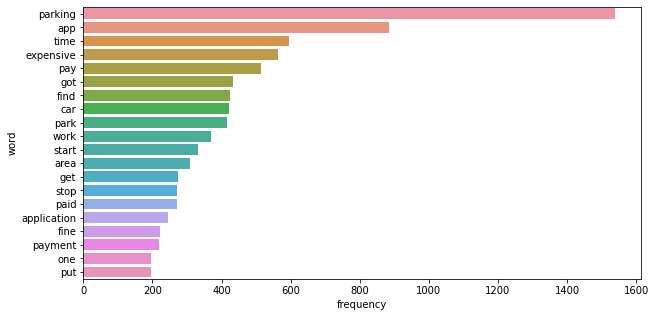

In [218]:
# common words assosiated with thumbs down review

neg_feedback_words = np.array([word.lower() for word in df_thumbs_down["post_rating_feedback_translated"].str.split().sum()])

# remove stop words
neg_feedback_words = [word for word in neg_feedback_words if word not in stop_words]

word_count = np.unique(neg_feedback_words, return_counts=True)
dict(zip(word_count[0],word_count[1]))

df_word_neg_freq = pd.DataFrame({"word":word_count[0], "frequency": word_count[1]})
df_word_neg_freq.sort_values(by="frequency", ascending=False, inplace=True)

# plot negative word frequencies
fig = plt.figure(figsize=(10, 5))
sns.barplot(data=df_word_neg_freq.head(20), y="word", x="frequency");
